#TIME SERIES ANALYSIS AND FORECASTING FOR STOCK MARKET

This project aims to analyze and forecast stock market trends using time series analysis techniques.

In [ ]:
#Import libraries

# 📦 DATA HANDLING & ANALYSIS
import pandas as pd
import numpy as np

# 📊 VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

# ⚠️ WARNINGS
import warnings
warnings.filterwarnings("ignore")

# ⏱️ TIME SERIES ANALYSIS (Statistical Models)
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 🔮 TIME SERIES FORECASTING (Facebook Prophet)
from prophet import Prophet

# 🤖 DEEP LEARNING (LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# 📈 MODEL EVALUATION METRICS
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# 🧾 Load data
df = pd.read_csv("/content/stock_data.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,Name
3014,12/22/2017,71.42,71.87,71.22,71.58,10979165,AABA
3015,12/26/2017,70.94,71.39,69.63,69.86,8542802,AABA
3016,12/27/2017,69.77,70.49,69.69,70.06,6345124,AABA
3017,12/28/2017,70.12,70.32,69.51,69.82,7556877,AABA
3018,12/29/2017,69.79,70.13,69.43,69.85,6613070,AABA


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,28.426479,28.766532,28.066558,28.412726,2.158391e+07
std,13.257242,13.356692,13.157326,13.258163,1.926231e+07
min,9.100000,9.480000,8.940000,8.950000,1.939061e+06
25%,16.175000,16.385000,15.970000,16.130000,1.248025e+07
50%,27.180000,27.490000,26.820000,27.100000,1.732130e+07
75%,36.655000,37.035000,36.305000,36.635000,2.512757e+07
max,73.020000,73.250000,72.460000,72.930000,4.382317e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Name,0


In [ ]:
df.Name.unique()

array(['AABA'], dtype=object)

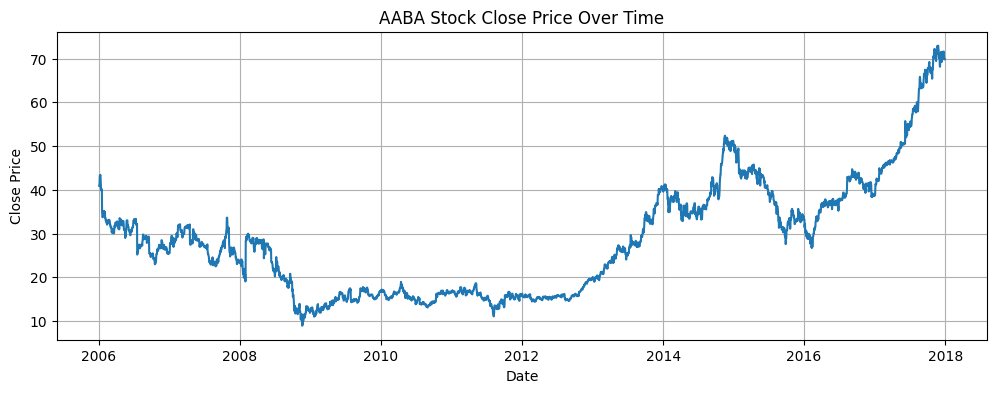

In [ ]:
# 🕓 Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# 📅 Sort by date to maintain chronological order
df.sort_values('Date', inplace=True)

# 🔁 Set Date as index for time series analysis
df.set_index('Date', inplace=True)

# 🧾 Use only the 'Close' column for forecasting
close_data = df['Close'].asfreq('D')  # Daily frequency

# 🔁 Forward-fill any NaNs from asfreq gaps
close_data = close_data.ffill()


# 📊 Quick visualization
plt.figure(figsize=(12, 4))
plt.plot(close_data)
plt.title("AABA Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


🔍 TIME SERIES DECOMPOSITION (TREND, SEASONALITY, RESIDUALS)

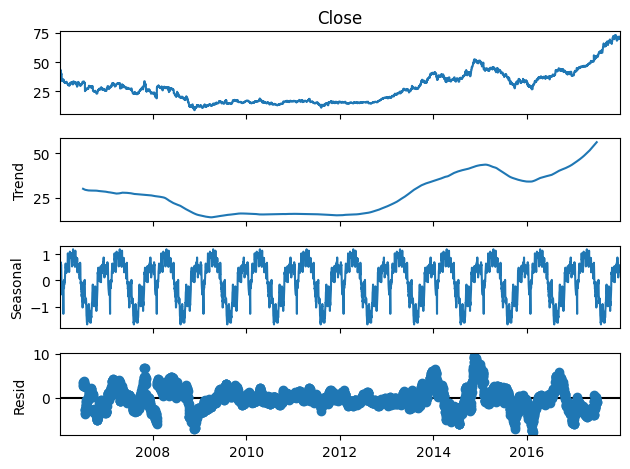

In [ ]:
# Decompose the time series
decomposition = seasonal_decompose(close_data, model='additive', period=365)

# Plot components: Trend, Seasonality, Residuals
decomposition.plot()
plt.tight_layout()
plt.show()

In [ ]:
# @title
# from statsmodels.tsa.seasonal import seasonal_decompose
# import matplotlib.pyplot as plt

# # Perform seasonal decomposition
# decomposition = seasonal_decompose(close_data, model='additive', period=365)

# # Extract components
# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid
# observed = decomposition.observed

# # Set up the plot
# plt.figure(figsize=(14, 10))

# # 1. Observed (Original Time Series)
# plt.subplot(411)
# plt.plot(observed, color='blue')
# plt.title('📈 Observed: Original Stock Close Price', fontsize=12)
# plt.ylabel("Price")
# plt.grid(True)

# # 2. Trend
# plt.subplot(412)
# plt.plot(trend, color='green')
# plt.title('📊 Trend: Long-term Price Movement', fontsize=12)
# plt.ylabel("Trend")
# plt.grid(True)

# # 3. Seasonality
# plt.subplot(413)
# plt.plot(seasonal, color='orange')
# plt.title('🔁 Seasonal: Repeating Yearly Patterns', fontsize=12)
# plt.ylabel("Seasonality")
# plt.grid(True)

# # 4. Residuals
# plt.subplot(414)
# plt.plot(residual, color='red')
# plt.title('🎯 Residual: Irregular or Random Noise', fontsize=12)
# plt.ylabel("Residual")
# plt.xlabel("Date")
# plt.grid(True)

# plt.tight_layout()
# plt.show()


In [ ]:
# @title
# Decompose the time series
decomposition = seasonal_decompose(close_data, model='multiplicative', period=365)

# Plot components: Trend, Seasonality, Residuals
decomposition.plot()
plt.tight_layout()
plt.show()

ARIMA Model Forecasting for Stock Prices (Next 365 Business Days)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


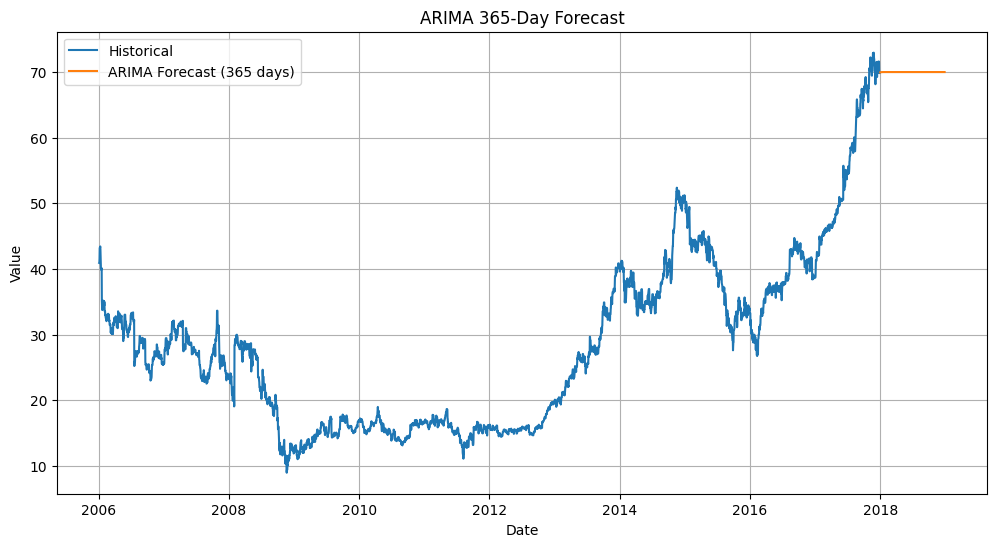

In [ ]:
#AutoRegressive Integrated Moving Average

arima_model = ARIMA(close_data, order=(5, 1, 0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=365)

arima_forecast_index = pd.date_range(start=close_data.index[-1] + pd.Timedelta(days=1), periods=365, freq='B')
arima_forecast = pd.Series(arima_forecast, index=arima_forecast_index)

# Plot
plt.figure(figsize=(12,6))
plt.plot(close_data, label='Historical')
plt.plot(arima_forecast, label='ARIMA Forecast (365 days)')
plt.legend()
plt.title('ARIMA 365-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


SARIMA Model Forecasting for Stock Prices (Next 365 Business Days)

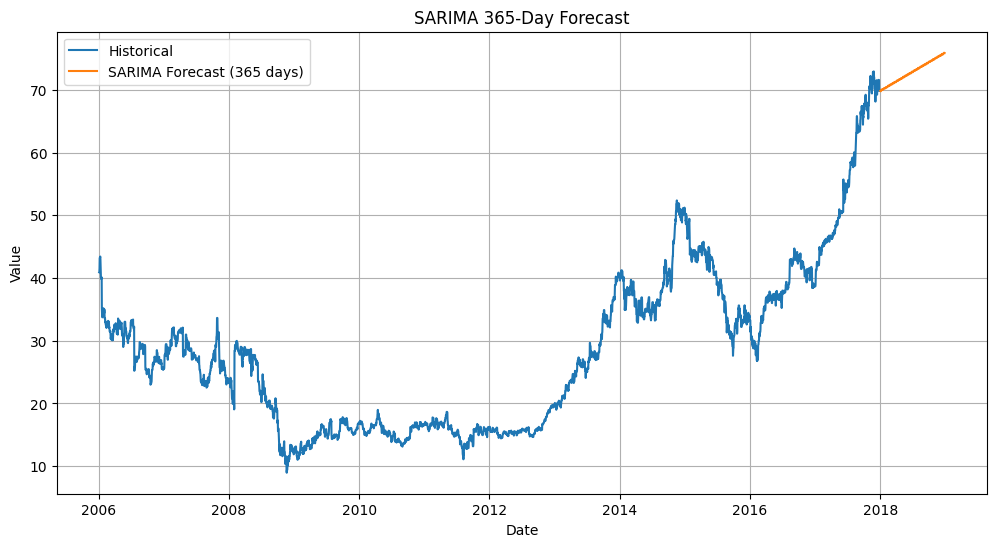

In [ ]:
# Define SARIMA model (tune seasonal_order)

# Seasonal AutoRegressive Integrated Moving Average
sarima_model = SARIMAX(close_data, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()

# Forecast
sarima_forecast = sarima_fit.forecast(steps=365)
sarima_forecast_index = pd.date_range(start=close_data.index[-1] + pd.Timedelta(days=1), periods=365, freq='B')
sarima_forecast = pd.Series(sarima_forecast, index=sarima_forecast_index)

# Plot
plt.figure(figsize=(12,6))
plt.plot(close_data, label='Historical')
plt.plot(sarima_forecast, label='SARIMA Forecast (365 days)')
plt.legend()
plt.title('SARIMA 365-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Prophet Model Forecasting for Stock Prices (Next 365 Business Days)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy9w75wxm/y0fcsxcp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy9w75wxm/550zdck4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78610', 'data', 'file=/tmp/tmpy9w75wxm/y0fcsxcp.json', 'init=/tmp/tmpy9w75wxm/550zdck4.json', 'output', 'file=/tmp/tmpy9w75wxm/prophet_modelukal1n7j/prophet_model-20250526070510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


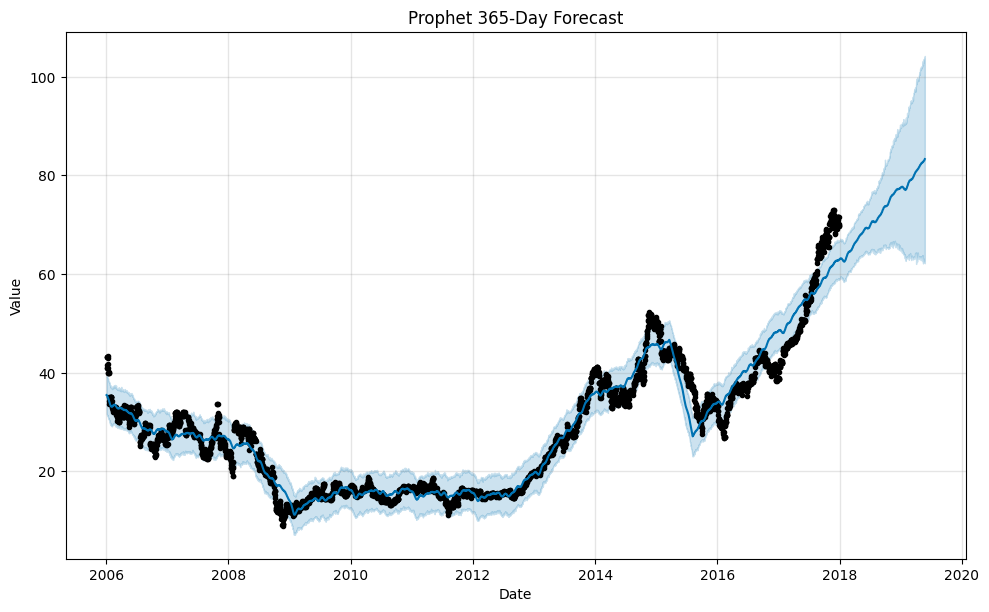

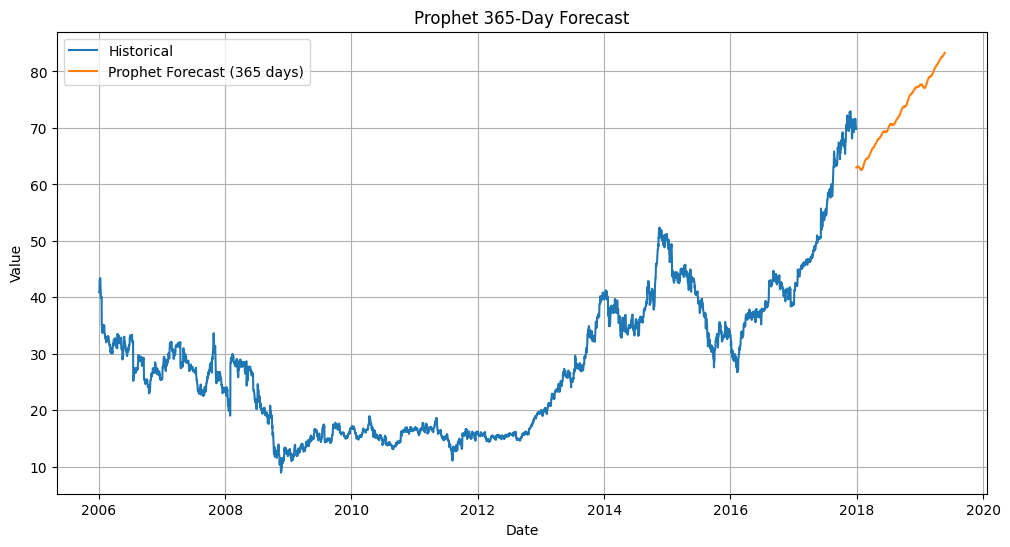

In [ ]:
# Prepare data (Historical data)
df_prophet = close_data.reset_index()
df_prophet.columns = ['ds', 'y']   #ds: Date column (datetime type),y: Actual values (e.g., closing prices)

# Fit model
model = Prophet()
model.fit(df_prophet) #The model learns patterns (trends, seasonality, etc.) from your historical data.

# Forecast
future = model.make_future_dataframe(periods=365,freq='B')
forecast_prophet = model.predict(future)

# Extract forecast series
prophet_forecast = forecast_prophet.set_index('ds')['yhat']

# Plot full forecast
fig = model.plot(forecast_prophet)
plt.title('Prophet 365-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Optional: Plot only the forecast portion
forecast_365 = forecast_prophet.set_index('ds').loc[close_data.index[-1]:]['yhat']
plt.figure(figsize=(12,6))
plt.plot(close_data, label='Historical')
plt.plot(forecast_365, label='Prophet Forecast (365 days)')
plt.legend()
plt.grid(True)
plt.title('Prophet 365-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

LSTM-Based 365-Day Time Series Forecasting using Scaled Historical Data

In [ ]:
# Ensure close_data is a NumPy array
data_array = close_data.values.reshape(-1, 1)

# Scale data to range [0,1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_array)

# Create sequences for LSTM
def create_sequences(data, window_size=60):
    X, y = [], []                         # Initialize empty lists for inputs and targets
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])      # for i in range (60,3080)//x=(0-59),y=60
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)
X = X.reshape((X.shape[0], X.shape[1], 1))  # 3D input for LSTM

# Define LSTM model
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


135/135 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 0.0145
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 3.8418e-04
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 3.6664e-04
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 3.1304e-04
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 2.8591e-04
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 2.6619e-04
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 2.8058e-04
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 2.5083e-04
Epoch 9/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 2.2502e-04
Epoch 10/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 2.0484e-04


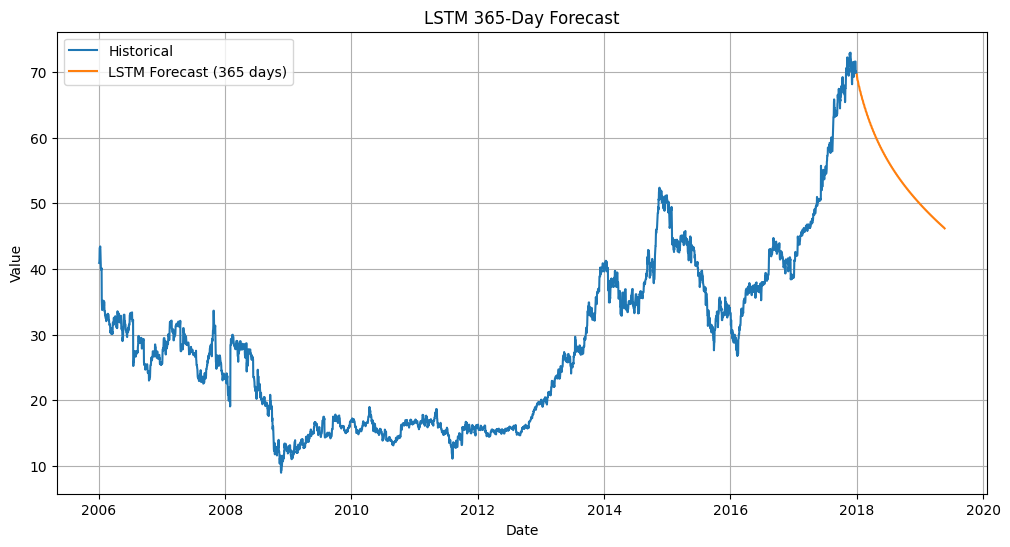

In [ ]:
# Inverse transform
lstm_forecast = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
lstm_forecast_index = pd.date_range(start=close_data.index[-1] + pd.Timedelta(days=1), periods=365, freq='B')
lstm_forecast = pd.Series(lstm_forecast, index=lstm_forecast_index)

# Plot
plt.figure(figsize=(12,6))
plt.plot(close_data, label='Historical')
plt.plot(lstm_forecast, label='LSTM Forecast (365 days)')
plt.legend()
plt.title('LSTM 365-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [ ]:
def rmse(true, pred):
    return np.sqrt(mean_squared_error(true, pred))

In [ ]:
# Split historical data into training and test sets (e.g., last 365 days as test; rest is training.)
train = close_data[:-365]
test = close_data[-365:]

In [ ]:
# # Prepare Prophet input
df_prophet_train = train.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
model_prophet = Prophet()
model_prophet.fit(df_prophet_train)

# Forecast on the test period
future = model_prophet.make_future_dataframe(periods=365)
forecast = model_prophet.predict(future)
forecast_prophet = forecast.set_index('ds')['yhat'][-365:]

# Evaluate

mse = mean_squared_error(test, forecast_prophet)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast_prophet)
r2 = r2_score(test, forecast_prophet)

print("Prophet Evaluation on Test Set:")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy9w75wxm/6goqc6bc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy9w75wxm/t0gbtg3_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16545', 'data', 'file=/tmp/tmpy9w75wxm/6goqc6bc.json', 'init=/tmp/tmpy9w75wxm/t0gbtg3_.json', 'output', 'file=/tmp/tmpy9w75wxm/prophet_modeliuvbz7xh/prophet_model-20250526070544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Evaluation on Test Set:
MSE : 582.1106
RMSE: 24.1270
MAE : 21.3906
R²  : -4.5966


In [ ]:
model_arima = ARIMA(train, order=(5, 1, 0))
results_arima = model_arima.fit()
forecast_arima = results_arima.forecast(steps=365)

mse = mean_squared_error(test, forecast_arima)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast_arima)
r2 = r2_score(test, forecast_arima)

print("📊 ARIMA Evaluation on Test Set")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

📊 ARIMA Evaluation on Test Set
MSE : 413.8635
RMSE: 20.3436
MAE : 17.6027
R²  : -2.9790


In [ ]:
model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results_sarima = model_sarima.fit()
forecast_sarima = results_sarima.forecast(steps=365)

mse = mean_squared_error(test, forecast_sarima)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast_sarima)
r2 = r2_score(test, forecast_sarima)

print("📊 SARIMA Evaluation on Test Set")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


📊 SARIMA Evaluation on Test Set
MSE : 390.6614
RMSE: 19.7652
MAE : 17.0903
R²  : -2.7560


In [ ]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train.values.reshape(-1, 1))

X_train, y_train = [], []
for i in range(60, len(scaled_train)):
    X_train.append(scaled_train[i-60:i])
    y_train.append(scaled_train[i])

X_train = np.array(X_train).reshape((-1, 60, 1))
y_train = np.array(y_train)

model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(60, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

total_data = pd.concat([train[-60:], test])
scaled_total = scaler.transform(total_data.values.reshape(-1, 1))

X_test = []
for i in range(60, len(scaled_total)):
    X_test.append(scaled_total[i-60:i])
X_test = np.array(X_test).reshape((-1, 60, 1))

lstm_preds = model.predict(X_test, verbose=0)
lstm_preds = scaler.inverse_transform(lstm_preds).flatten()

mse = mean_squared_error(test, lstm_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, lstm_preds)
r2 = r2_score(test, lstm_preds)

print("📊 LSTM Evaluation on Test Set")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


📊 LSTM Evaluation on Test Set
MSE : 1.3543
RMSE: 1.1637
MAE : 0.8716
R²  : 0.9870


🔍 Interpretation:
LSTM is clearly the best model:

Lowest MSE, RMSE, and MAE → it has the least error.

R² = 0.987 → means the model explains 98.7% of the variance in the test data. Excellent fit!

Prophet, ARIMA, and SARIMA performed poorly:

All have negative R², meaning they performed worse than just predicting the average.

High errors (especially Prophet with MSE over 582 and RMSE over 24).

📌 Conclusion:
Your LSTM model is significantly more accurate and reliable than the traditional time series models (Prophet, ARIMA, SARIMA) for this dataset. It would be the preferred choice for making future predictions.